<a href="https://colab.research.google.com/github/navbharti/programming/blob/master/python/MNIST_prediction_through_simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Simple Neural Network for training MNIST Hand Written Image Prediction

# Import the required library


In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

# Load the MNIST data from keras.dataset and split-up as training and test dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Explore the loaded dataset

In [ ]:
print(f"X_train.shape: {X_train.shape} and y_train.shape: {y_train.shape}")

X_train.shape: (60000, 28, 28) and y_train.shape: (60000,)


In [ ]:
print(f"X_test.shape: {X_test.shape} and y_test.shape: {y_test.shape}")

X_test.shape: (10000, 28, 28) and y_test.shape: (10000,)


# print an image matrix

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(f"X_train[0].shape: {X_train[0].shape}")

X_train[0].shape: (28, 28)


# plot one image

Labe : 8


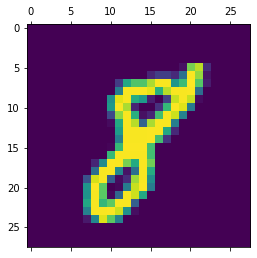

In [ ]:
plt.matshow(X_train[17])
print(f"Labe : {y_train[17]}")

# Flatten the 2D image to a Vector form

In [ ]:
X_train_flat = X_train.reshape(len(X_train), 28 * 28)
X_test_flat = X_test.reshape(len(X_test), 28 * 28)


# Check shapes after flattening the data

In [ ]:
print(f"X_train_flat.shape: {X_train_flat.shape} and y_train.shape: {y_train.shape}")
print(f"X_test_flat.shape: {X_train_flat.shape} and y_test.shape: {y_test.shape}")

X_train_flat.shape: (60000, 784) and y_train.shape: (60000,)
X_test_flat.shape: (60000, 784) and y_test.shape: (10000,)


# Print one image Vector 

In [ ]:
print("Single Train Image Vector: ", X_train_flat[0])
print("Train Image Label: ", y_train[0])

Image Vector:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0

In [ ]:
print("Single Test Image Vector: ", X_test_flat[0])
print("Test Image Label: ", y_test[0])

Single Test Image Vector:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 254 241 198 198 198 198

# Normalize the Vector Pixel value [0, 1]

In [ ]:
X_train_flat_scalled = X_train_flat / 255.0
X_test_flat_scalled = X_test_flat / 255.0

# Checke the Normalized data

In [ ]:
print("Single Train Image Vector: ", X_train_flat_scalled[0])
print("Single Train Image Label: ", y_train[0])

Single Train Image Vector:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

# plot the normalized image data

Single Train Image Label: 5


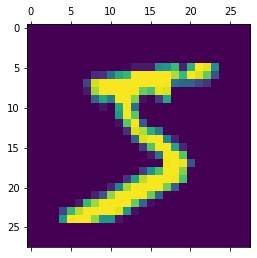

In [ ]:
plt.matshow(X_train_flat_scalled[0].reshape((28, 28)))
print(f"Single Train Image Label: {y_train[0]}")

# Create an instance of a Simple Sequential Neural Network with Dense Layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

# Compile the Model

In [ ]:
from tensorflow.python import metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# adam is Adaptive Moment Estimation: adapt the learning rate for each weight of the neural network.

# train the Model using fit() method

In [ ]:
model.fit(X_train_flat_scalled, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4705 - accuracy: 0.8776
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2623 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2582 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2531 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

# check the accuracy of the trained model using evaluate() method

In [ ]:
model.evaluate(X_test_flat_scalled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9277


[0.26378464698791504, 0.9276999831199646]

# Predict the new data using the trained model

In [ ]:
predict_one = model.predict(X_test_flat_scalled)
print(f"Predicted Label: {np.argmax(predict_one[0])} and Actual label: {y_test[0]}")

313/313 [==============================] - 0s 946us/step
Predicted Label: 7 and Actual label: 7


In [ ]:
predict_one[0]

array([5.78929950e-03, 2.08982698e-08, 1.55315762e-02, 9.74396229e-01,
       2.19204556e-03, 1.27689034e-01, 5.18683478e-08, 9.99865413e-01,
       1.17322564e-01, 7.60222614e-01], dtype=float32)

In [ ]:
np.sum(predict_one[0])

3.003009

# Sigmoid function definition

In [ ]:
import numpy as np 
def sigmoid(x):
 return 1/(1 + np.exp(-x))

print(f"sigmoid(56): {sigmoid(56)}")
print(f"sigmoid(-45): {sigmoid(-45)}")

sigmoid(56): 1.0
sigmoid(-45): 2.8625185805493937e-20


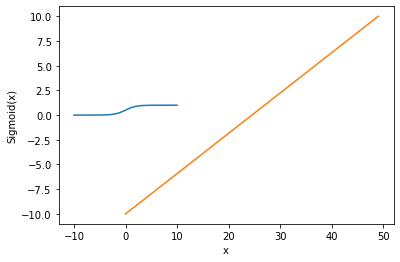

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 50)   
p = sigmoid(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.plot(x)
plt.show()

# process the Predicted value for the label

In [ ]:
predict = [np.argmax(i) for i in predict_one]


# Interactive Prediction 

Enter the index of image: 6644
Predicted Label: 1 and Actual Label: 1


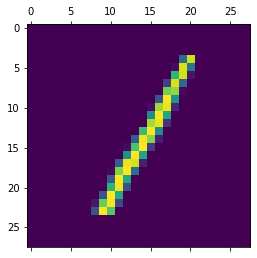

In [ ]:
img_idx = int(input("Enter the index of image: "))
plt.matshow(X_test[img_idx])
print(f"Predicted Label: {predict[img_idx]} and Actual Label: {y_test[img_idx]}")

# Plot Confusion Matrix for the trained model


Text(69.0, 0.5, 'Truth')

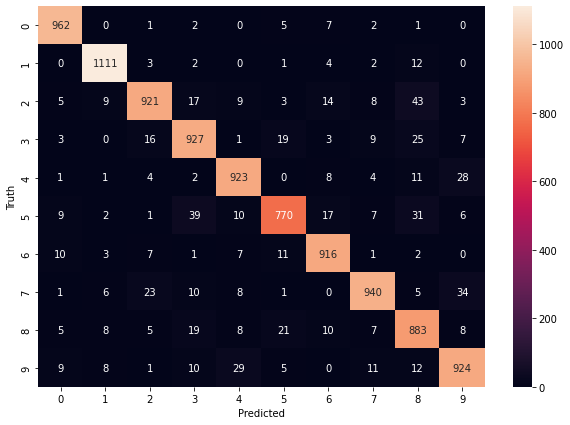

In [ ]:
import seaborn as sn

cm_mat = tf.math.confusion_matrix(labels=y_test, predictions=predict)

plt.figure(figsize=(10, 7))
sn.heatmap(cm_mat, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
